In [1]:
#task1
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Display first few rows
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
#task2
median_bp = df[df['Outcome'] == 1]['BloodPressure'].median()
print("Median Blood Pressure of Diabetic Patients:", median_bp)


Median Blood Pressure of Diabetic Patients: 74.0


In [3]:
#task3
# Count the number of cases in each class
print(df['Outcome'].value_counts(normalize=True))


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [4]:
#task4
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable

In [5]:
#task5
#stratify=y ensures class distribution in train-test split remains the same as the original dataset.

In [6]:
#task6
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)


In [7]:
#task7
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.7447916666666666


In [8]:
#task8
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 1.0
Testing Accuracy: 0.7447916666666666


In [9]:
#task9
#TASK 9: Understanding Precision & Recall

    #Precision: Of the predicted positive cases, how many are actually positive?
    #Recall (Sensitivity): Out of all actual positive cases, how many did the model correctly identify?

In [10]:
#task10

from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

# Classification Report
print(classification_report(y_test, y_pred))


[[106  19]
 [ 30  37]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       125
           1       0.66      0.55      0.60        67

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



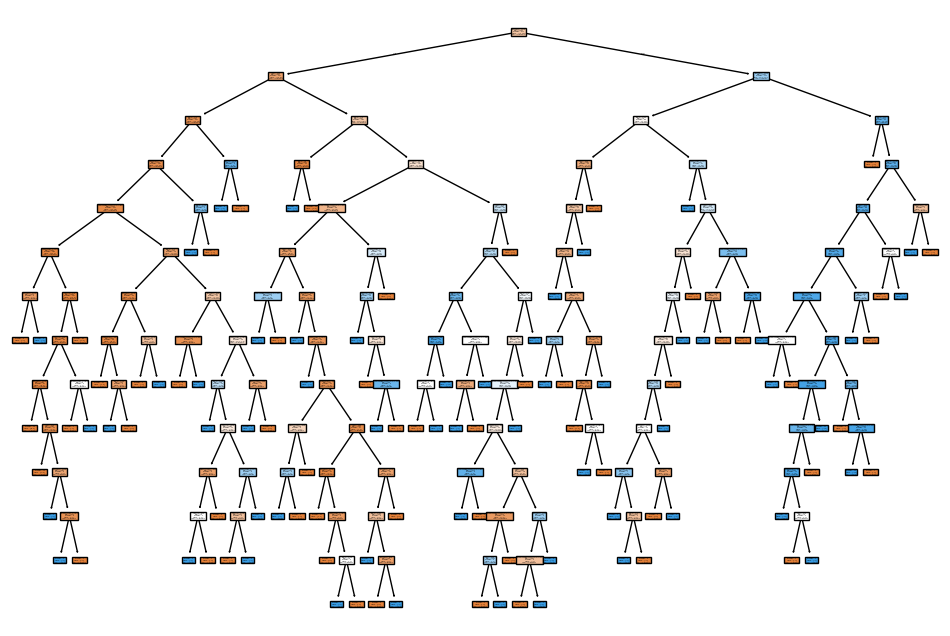

In [11]:
#task11
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.show()


In [12]:
#task12

In [14]:
#task13

from sklearn.neighbors import KNeighborsClassifier

# Train KNN model with 4 neighbors
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_test, y_pred_knn))

# Classification Report
print(classification_report(y_test, y_pred_knn))


[[114  11]
 [ 41  26]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       125
           1       0.70      0.39      0.50        67

    accuracy                           0.73       192
   macro avg       0.72      0.65      0.66       192
weighted avg       0.72      0.73      0.70       192



In [23]:
#task14

df_weather = pd.read_csv("/content/pm25_2016_2020.csv")

# Identify geographic features (Latitude & Longitude)
df_weather[["latitude_x", "longitude_x"]].head()


,latitude_x,longitude_x
0,39.024265,-95.711275
1,39.024265,-95.711275
2,39.024265,-95.711275
3,39.024265,-95.711275
4,39.024265,-95.711275


In [25]:
#task15
x = df_weather[["latitude_x", "longitude_x"]]


In [26]:
#Task 16

In [27]:
from sklearn.cluster import KMeans

# Fit K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Count observations per cluster
print(df['Cluster'].value_counts())


Cluster
0    25672
2    24659
3    22089
1    16918
4    10662
Name: count, dtype: int64


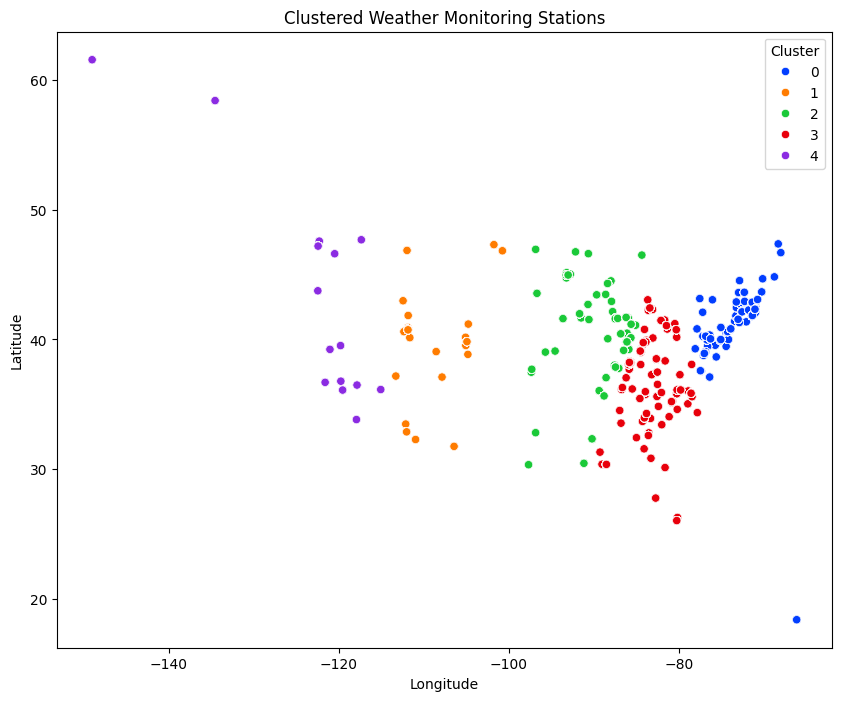

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.scatterplot(x=df['longitude_x'], y=df['latitude_x'], hue=df['Cluster'], palette='bright')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Weather Monitoring Stations')
plt.show()
